### Reading and Exploring Dataset¶
https://towardsdatascience.com/natural-language-processing-nlp-for-machine-learning-d44498845d5b

In [1]:
# loading data into pandas df
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data5 = pd.read_csv("Data5.csv") 
data6 = pd.read_csv("Data6.csv") 

In [3]:
subset5 = data5[['Summary', 'Actual Sentiment']]
subset5.columns = ['text', 'sentiment']

In [4]:
subset6 = data6[['Summary', 'Sentiment ']]
subset6.columns = ['text', 'sentiment']

In [5]:
subset = pd.concat([subset5, subset6], ignore_index=True)
print(subset.shape)

(4108, 2)


In [6]:
subset.head()

,text,sentiment
0,Sky Automation Test Manager Colin Ramsay is ha...,Positive
1,TDC will create two new business units OpCo an...,Neutral
2,Client is concerned with our delivery.,Negative
3,The delivery timelines are very well met as pe...,Positive
4,Client satisfaction from the business and BT (...,Negative


##### Sentiment distribution

In [7]:
subset['sentiment'].value_counts()

Neutral      1654
Positive     1464
Negative      880
Negative      109
negative        1
Name: sentiment, dtype: int64

##### Label consolidation

In [8]:
def label_corr(text):
    text = text.lower().strip()
    if text == 'nuetral':
        text = 'neutral'
    return text

In [9]:
subset['sentiment'] = subset['sentiment'].astype('str')
print(type(subset['sentiment'][1]))
subset['sentiment'] = [label_corr(i) for i in subset['sentiment']]
print(subset.shape)
subset['sentiment'].value_counts()

<class 'str'>
(4108, 2)


neutral     1654
positive    1464
negative     990
Name: sentiment, dtype: int64

##### Remove NaN

In [10]:
subset.dropna(inplace=True)
subset.shape

(4100, 2)

In [11]:
subset['sentiment'].value_counts()

neutral     1647
positive    1463
negative     990
Name: sentiment, dtype: int64

In [12]:
subset['sentiment'].value_counts(normalize=True) * 100

neutral     40.170732
positive    35.682927
negative    24.146341
Name: sentiment, dtype: float64

In [13]:
data_final = subset

In [14]:
data_final.head()

,text,sentiment
0,Sky Automation Test Manager Colin Ramsay is ha...,positive
1,TDC will create two new business units OpCo an...,neutral
2,Client is concerned with our delivery.,negative
3,The delivery timelines are very well met as pe...,positive
4,Client satisfaction from the business and BT (...,negative


In [15]:
data_final=data_final.drop_duplicates(subset={"text"}, keep='first', inplace=False)
data_final.shape

(3146, 2)

In [18]:
# Loading for data cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

# Loading for stemming & Lemmatizer
from nltk.stem import SnowballStemmer, WordNetLemmatizer

In [16]:
def sentence_to_words(raw_sentence):
    """This function modifies the sentences to words by removing html marks,
    non-letters etc."""
    
    sent_text = BeautifulSoup(raw_sentence.encode('utf-8'), "lxml").get_text()  # Remove HTML markings
    text = re.sub(r'-\s+', '', sent_text)
    letters = re.sub('[^a-zA-Z]|\n', ' ', text)  # Remove non-letters: all special chars, numbers, puncs etc.
    words = letters.lower().split()
    stop_words = [w for w in stopwords.words('english') if not w in ['no', 'not', 'dont', 'isnt']] ## Negative words remain
    important_words = [w for w in words if not w in stop_words and len(w)>2]
    return ' '.join(important_words)

In [19]:
data_final['clean_text'] = [sentence_to_words(t) for t in list(data_final['text'])]
data_final.head()

,text,sentiment,clean_text
0,Sky Automation Test Manager Colin Ramsay is ha...,positive,sky automation test manager colin ramsay happy...
1,TDC will create two new business units OpCo an...,neutral,tdc create two new business units opco netco o...
2,Client is concerned with our delivery.,negative,client concerned delivery
3,The delivery timelines are very well met as pe...,positive,delivery timelines well met per client require...
4,Client satisfaction from the business and BT (...,negative,client satisfaction business stakeholders cont...


In [20]:
def stemming(text_list):
    stemmer = SnowballStemmer('english')
    return ' '.join([stemmer.stem(w) for w in text_list])

def lemmatization(text_list):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w) for w in text_list])

In [21]:
data_final['stem_text'] = [stemming(each.split()) for each in data_final['clean_text']]
data_final['lemma_text'] = [lemmatization(each.split()) for each in data_final['clean_text']]

data_final.head()

,text,sentiment,clean_text,stem_text,lemma_text
0,Sky Automation Test Manager Colin Ramsay is ha...,positive,sky automation test manager colin ramsay happy...,sky autom test manag colin ramsay happi pleas ...,sky automation test manager colin ramsay happy...
1,TDC will create two new business units OpCo an...,neutral,tdc create two new business units opco netco o...,tdc creat two new busi unit opco netco opco cu...,tdc create two new business unit opco netco op...
2,Client is concerned with our delivery.,negative,client concerned delivery,client concern deliveri,client concerned delivery
3,The delivery timelines are very well met as pe...,positive,delivery timelines well met per client require...,deliveri timelin well met per client requir tr...,delivery timeline well met per client requirem...
4,Client satisfaction from the business and BT (...,negative,client satisfaction business stakeholders cont...,client satisfact busi stakehold continu alert ...,client satisfaction business stakeholder conti...


In [22]:
# What is the shape of the dataset?
print("Input data has {} rows and {} columns".format(len(data_final), len(data_final.columns)))

Input data has 3146 rows and 5 columns


In [23]:
data_final=data_final.drop_duplicates(subset={"stem_text","lemma_text"}, keep='first', inplace=False)
data_final.shape

(2789, 5)

In [24]:
# How many spam/ham are there?
print("Out of {} rows, {} are neutral, {} are positive and {} are negative".format(len(data_final),
                                                       len(data_final[data_final['sentiment']=='neutral']),
                                                       len(data_final[data_final['sentiment']=='positive']),
                                                       len(data_final[data_final['sentiment']=='negative'])))

Out of 2789 rows, 1209 are neutral, 1008 are positive and 572 are negative


In [25]:
data_final['sentiment'].value_counts()    ### Clean Data

neutral     1209
positive    1008
negative     572
Name: sentiment, dtype: int64

In [26]:
# How much missing data is there?
print("Number of null in label: {}".format(data_final['sentiment'].isnull().sum()))
print("Number of null in text: {}".format(data_final['text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


### 1. Preprocessing Dataset

##### Remove punctuation

In [20]:
'''
import string
string.punctuation
'''

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
'''
#Function to remove Punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct

data_final['text_clean'] = data_final['text'].apply(lambda x: remove_punct(x))
data_final.head()
'''

'\n#Function to remove Punctuation\ndef remove_punct(text):\n    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations\n    return text_nopunct\n\ndata_final[\'text_clean\'] = data_final[\'text\'].apply(lambda x: remove_punct(x))\ndata_final.head()\n'

In [28]:
#data_final['text'][9]

In [29]:
#data_final['text_clean'][9]

##### Tokenization

In [30]:
import re
# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

data_final['Stext_tokenized'] = data_final['stem_text'].apply(lambda x: tokenize(x.lower())) 
#We convert to lower as Python is case-sensitive. 
data_final.head()

,text,sentiment,clean_text,stem_text,lemma_text,Stext_tokenized
0,Sky Automation Test Manager Colin Ramsay is ha...,positive,sky automation test manager colin ramsay happy...,sky autom test manag colin ramsay happi pleas ...,sky automation test manager colin ramsay happy...,"[sky, autom, test, manag, colin, ramsay, happi..."
1,TDC will create two new business units OpCo an...,neutral,tdc create two new business units opco netco o...,tdc creat two new busi unit opco netco opco cu...,tdc create two new business unit opco netco op...,"[tdc, creat, two, new, busi, unit, opco, netco..."
2,Client is concerned with our delivery.,negative,client concerned delivery,client concern deliveri,client concerned delivery,"[client, concern, deliveri]"
3,The delivery timelines are very well met as pe...,positive,delivery timelines well met per client require...,deliveri timelin well met per client requir tr...,delivery timeline well met per client requirem...,"[deliveri, timelin, well, met, per, client, re..."
4,Client satisfaction from the business and BT (...,negative,client satisfaction business stakeholders cont...,client satisfact busi stakehold continu alert ...,client satisfaction business stakeholder conti...,"[client, satisfact, busi, stakehold, continu, ..."


##### Remove stopwords

In [31]:
'''
import nltk
stopword = nltk.corpus.stopwords.words('english')# All English Stopwords
'''

"\nimport nltk\nstopword = nltk.corpus.stopwords.words('english')# All English Stopwords\n"

In [32]:
'''
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text

data_final['text_nostop'] = data_final['text_tokenized'].apply(lambda x: remove_stopwords(x))
data_final.head()
'''

"\n# Function to remove Stopwords\ndef remove_stopwords(tokenized_list):\n    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords\n    return text\n\ndata_final['text_nostop'] = data_final['text_tokenized'].apply(lambda x: remove_stopwords(x))\ndata_final.head()\n"

##### Stemming

In [33]:
'''
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data_final['text_stemmed'] = data_final['text_nostop'].apply(lambda x: stemming(x))
data_final.head()
'''

"\nps = nltk.PorterStemmer()\n\ndef stemming(tokenized_text):\n    text = [ps.stem(word) for word in tokenized_text]\n    return text\n\ndata_final['text_stemmed'] = data_final['text_nostop'].apply(lambda x: stemming(x))\ndata_final.head()\n"

##### Saving the cleaned Data

In [28]:
'''
# We save the file as CSV 
# CSV(Comma-separated-value), It is easier to read compared to tsv(Tab-separated-value) and can be opened on Excel.
data_final.to_csv("projectSummary_cleanednolemma.csv", sep=',')
'''

'\n# We save the file as CSV \n# CSV(Comma-separated-value), It is easier to read compared to tsv(Tab-separated-value) and can be opened on Excel.\ndata_final.to_csv("projectSummary_cleanednolemma.csv", sep=\',\')\n'

##### Function to remove punctuation, tokenize, remove, stem and stopwords

In [29]:
'''
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
'''

In [30]:
'''
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text
'''

In [34]:
'''
data_final['text_fstemmed'] = data_final['text_nostop'].apply(lambda x: clean_text(x))
data_final.head(2)
'''

"\ndata_final['text_fstemmed'] = data_final['text_nostop'].apply(lambda x: clean_text(x))\ndata_final.head(2)\n"

In [35]:
'''
# Delete the "Area" column from the dataframe
data_final = data_final.drop("text_fstemmed", axis=1)
data_final.head()
'''

'\n# Delete the "Area" column from the dataframe\ndata_final = data_final.drop("text_fstemmed", axis=1)\ndata_final.head()\n'

In [36]:
Data_Fture = data_final

In [34]:
'''
# Function to calculate length of message excluding space
Data_Fture['stem_len'] = Data_Fture['text_stemmed'].apply(lambda x: len(x) - x.count(" "))
Data_Fture = Data_Fture.drop("text_nostop",axis=1)
Data_Fture.head()
'''

'\n# Function to calculate length of message excluding space\nData_Fture[\'stem_len\'] = Data_Fture[\'text_stemmed\'].apply(lambda x: len(x) - x.count(" "))\nData_Fture = Data_Fture.drop("text_nostop",axis=1)\nData_Fture.head()\n'

In [37]:
Data_Fture.head()

,text,sentiment,clean_text,stem_text,lemma_text,Stext_tokenized
0,Sky Automation Test Manager Colin Ramsay is ha...,positive,sky automation test manager colin ramsay happy...,sky autom test manag colin ramsay happi pleas ...,sky automation test manager colin ramsay happy...,"[sky, autom, test, manag, colin, ramsay, happi..."
1,TDC will create two new business units OpCo an...,neutral,tdc create two new business units opco netco o...,tdc creat two new busi unit opco netco opco cu...,tdc create two new business unit opco netco op...,"[tdc, creat, two, new, busi, unit, opco, netco..."
2,Client is concerned with our delivery.,negative,client concerned delivery,client concern deliveri,client concerned delivery,"[client, concern, deliveri]"
3,The delivery timelines are very well met as pe...,positive,delivery timelines well met per client require...,deliveri timelin well met per client requir tr...,delivery timeline well met per client requirem...,"[deliveri, timelin, well, met, per, client, re..."
4,Client satisfaction from the business and BT (...,negative,client satisfaction business stakeholders cont...,client satisfact busi stakehold continu alert ...,client satisfaction business stakeholder conti...,"[client, satisfact, busi, stakehold, continu, ..."


In [38]:
Data_Fture['stem_cnt'] = Data_Fture['Stext_tokenized'].apply(lambda x: len(str(x).split(" ")))

In [37]:
#Data_Fture = Data_Fture.drop("stem_len", axis=1)

In [39]:
Data_Fture.head()

,text,sentiment,clean_text,stem_text,lemma_text,Stext_tokenized,stem_cnt
0,Sky Automation Test Manager Colin Ramsay is ha...,positive,sky automation test manager colin ramsay happy...,sky autom test manag colin ramsay happi pleas ...,sky automation test manager colin ramsay happy...,"[sky, autom, test, manag, colin, ramsay, happi...",11
1,TDC will create two new business units OpCo an...,neutral,tdc create two new business units opco netco o...,tdc creat two new busi unit opco netco opco cu...,tdc create two new business unit opco netco op...,"[tdc, creat, two, new, busi, unit, opco, netco...",42
2,Client is concerned with our delivery.,negative,client concerned delivery,client concern deliveri,client concerned delivery,"[client, concern, deliveri]",3
3,The delivery timelines are very well met as pe...,positive,delivery timelines well met per client require...,deliveri timelin well met per client requir tr...,delivery timeline well met per client requirem...,"[deliveri, timelin, well, met, per, client, re...",10
4,Client satisfaction from the business and BT (...,negative,client satisfaction business stakeholders cont...,client satisfact busi stakehold continu alert ...,client satisfaction business stakeholder conti...,"[client, satisfact, busi, stakehold, continu, ...",16


In [40]:
print(Data_Fture['text'][0])
print(Data_Fture['clean_text'][0])
print(Data_Fture['lemma_text'][0])
print(Data_Fture['stem_text'][0])
print(Data_Fture['Stext_tokenized'][0])
print(Data_Fture['stem_cnt'][0])

Sky Automation Test Manager Colin Ramsay is happy and pleased with how offshore team is performing.
sky automation test manager colin ramsay happy pleased offshore team performing
sky automation test manager colin ramsay happy pleased offshore team performing
sky autom test manag colin ramsay happi pleas offshor team perform
['sky', 'autom', 'test', 'manag', 'colin', 'ramsay', 'happi', 'pleas', 'offshor', 'team', 'perform']
11


In [39]:
'''
print(Data_Fture['text'][0])
print(Data_Fture['clean_text'][0])
print(Data_Fture['lemma_text'][0])
print(Data_Fture['stem_text'][0])
print(Data_Fture['Stext_tokenized'][0])
print(Data_Fture['stem_cnt'][0])
'''

Sky Automation Test Manager Colin Ramsay is happy and pleased with how offshore team is performing.
Sky Automation Test Manager Colin Ramsay is happy and pleased with how offshore team is performing
['sky', 'automation', 'test', 'manager', 'colin', 'ramsay', 'is', 'happy', 'and', 'pleased', 'with', 'how', 'offshore', 'team', 'is', 'performing']
['sky', 'autom', 'test', 'manag', 'colin', 'ramsay', 'happi', 'pleas', 'offshor', 'team', 'perform']
11


In [41]:
Data_Fture['stem_cnt'].describe()

count    2789.000000
mean       46.461456
std        45.282594
min         1.000000
25%        13.000000
50%        30.000000
75%        67.000000
max       221.000000
Name: stem_cnt, dtype: float64

In [42]:
print("total sum of count =",Data_Fture.stem_cnt.sum())

total sum of count = 129581


In [42]:
#Data_Fture.loc[Data_Fture['stem_cnt'].idxmax()]

In [43]:
#For Visualizing to check if message text length and text count is good feature or not.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [44]:
#Data_Fture.text_cnt = Data_Fture.text_cnt.astype(int)

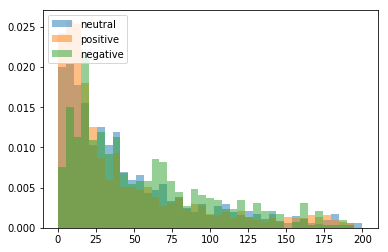

In [45]:
bins = np.linspace(0, 200, 40)

plt.hist(Data_Fture[Data_Fture['sentiment']=='neutral']['stem_cnt'], bins, alpha=0.5, normed=True, label='neutral')
plt.hist(Data_Fture[Data_Fture['sentiment']=='positive']['stem_cnt'], bins, alpha=0.5, normed=True, label='positive')
plt.hist(Data_Fture[Data_Fture['sentiment']=='negative']['stem_cnt'], bins, alpha=0.5, normed=True, label='negative')

plt.legend(loc='upper left')
plt.show()

In [46]:
print(Data_Fture[Data_Fture['sentiment']=='neutral']['stem_cnt'].sum())
print(Data_Fture[Data_Fture['sentiment']=='positive']['stem_cnt'].sum())
print(Data_Fture[Data_Fture['sentiment']=='negative']['stem_cnt'].sum())

56027
42172
31382


In [101]:
56027+42172+31382

129581

In [47]:
Data_Fture.groupby('sentiment').sum()

,stem_cnt
sentiment,
negative,31382
neutral,56027
positive,42172


In [49]:
Data_Fture.stem_cnt.sum()

129581

In [50]:
neutral = Data_Fture[Data_Fture['sentiment']=='neutral']['stem_cnt'].values

In [51]:
neutral

array([42, 18, 19, ..., 28,  4,  2], dtype=int64)

In [52]:
Data_Fture.head()

,text,sentiment,clean_text,stem_text,lemma_text,Stext_tokenized,stem_cnt
0,Sky Automation Test Manager Colin Ramsay is ha...,positive,sky automation test manager colin ramsay happy...,sky autom test manag colin ramsay happi pleas ...,sky automation test manager colin ramsay happy...,"[sky, autom, test, manag, colin, ramsay, happi...",11
1,TDC will create two new business units OpCo an...,neutral,tdc create two new business units opco netco o...,tdc creat two new busi unit opco netco opco cu...,tdc create two new business unit opco netco op...,"[tdc, creat, two, new, busi, unit, opco, netco...",42
2,Client is concerned with our delivery.,negative,client concerned delivery,client concern deliveri,client concerned delivery,"[client, concern, deliveri]",3
3,The delivery timelines are very well met as pe...,positive,delivery timelines well met per client require...,deliveri timelin well met per client requir tr...,delivery timeline well met per client requirem...,"[deliveri, timelin, well, met, per, client, re...",10
4,Client satisfaction from the business and BT (...,negative,client satisfaction business stakeholders cont...,client satisfact busi stakehold continu alert ...,client satisfaction business stakeholder conti...,"[client, satisfact, busi, stakehold, continu, ...",16


In [54]:
neutral_w = Data_Fture[Data_Fture['sentiment']=='neutral']['Stext_tokenized'].values

In [55]:
neutral_w.shape

(1209,)

In [56]:
neutral_w[0]

['tdc',
 'creat',
 'two',
 'new',
 'busi',
 'unit',
 'opco',
 'netco',
 'opco',
 'custom',
 'focus',
 'busi',
 'remit',
 'drive',
 'forward',
 'digit',
 'servic',
 'netco',
 'incorpor',
 'tdc',
 'network',
 'infrastructur',
 'wholesal',
 'oper',
 'accentur',
 'start',
 'help',
 'tdc',
 'direct',
 'provid',
 'need',
 'resourc',
 'guidanc',
 'john',
 'schmidt',
 'capac',
 'manag',
 'oeb',
 'applic',
 'replac',
 'martin',
 'tdc']

In [57]:
print(Data_Fture['sentiment']=='neutral')

0       False
1        True
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12       True
13       True
14       True
15      False
16      False
17       True
18       True
19      False
20      False
21      False
22       True
23      False
24       True
25       True
26       True
27       True
28      False
29       True
        ...  
4008    False
4009    False
4011    False
4012    False
4016    False
4017    False
4020    False
4025    False
4027    False
4028    False
4035    False
4037    False
4039    False
4041    False
4042    False
4043    False
4044    False
4045    False
4046     True
4047    False
4048    False
4049    False
4050    False
4051    False
4052    False
4055    False
4057    False
4058    False
4060    False
4072    False
Name: sentiment, Length: 2789, dtype: bool


In [58]:
Data_Fture['Stext_tokenized'][12]

['work',
 'onsit',
 'lead',
 'coordin',
 'function',
 'technic',
 'side',
 'week',
 'govern',
 'onsit',
 'offshor',
 'lead',
 'set',
 'review',
 'progress',
 'like',
 'risk',
 'issu']

In [59]:
positive_w = Data_Fture[Data_Fture['sentiment']=='positive']['Stext_tokenized'].values

In [60]:
positive_w.shape

(1008,)

In [61]:
negative_w = Data_Fture[Data_Fture['sentiment']=='negative']['Stext_tokenized'].values

In [62]:
negative_w.shape

(572,)

In [102]:
572 + 1008 + 1209

2789

In [63]:
positive_w == neutral_w

False

In [64]:
positive_w == negative_w

False

In [65]:
negative_w == neutral_w

False

In [66]:
#https://coderwall.com/p/rcmaea/flatten-a-list-of-lists-in-one-line-in-python
positive_words = [y for x in positive_w for y in x]

In [67]:
#positive_words

In [68]:
len(positive_words)

42172

In [69]:
neutral_words = [y for x in neutral_w for y in x]

In [70]:
len(neutral_words)

56027

In [71]:
negative_words = [y for x in negative_w for y in x]

In [72]:
len(negative_words)

31382

In [103]:
31382 + 56027 + 42172

129581

### Distinct count on each class

In [73]:
len(set(positive_words))

4375

In [74]:
len(set(neutral_words))

4678

In [75]:
len(set(negative_words))

2610

In [104]:
2610 + 4678 + 4375

11663

In [109]:

    # Import pandas library 
import pandas as pd 
  
# initialize list of lists 
data = [['positive', 4375], ['neutral', 4678], ['negative', 2610] ] 
  
# Create the pandas DataFrame 
D5 = pd.DataFrame(data, columns = ['Sentiment', 'No. of words']) 
  
# print dataframe. 
D5


,Sentiment,No. of words
0,positive,4375
1,neutral,4678
2,negative,2610


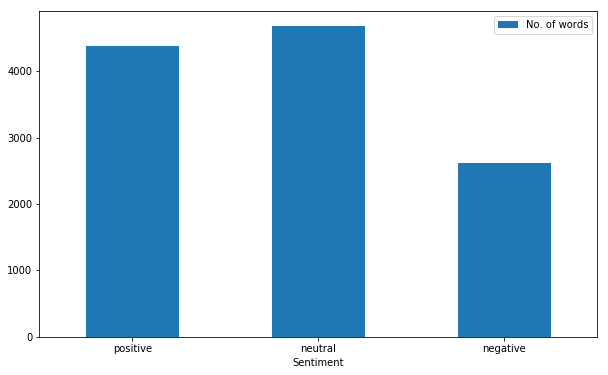

In [112]:
D5_bar = D5.plot.bar(x='Sentiment', y='No. of words',  figsize=(10, 6),rot=0)

### common between two classes

In [76]:
com_PoNeu = set(positive_words).intersection(neutral_words)

In [77]:
len(com_PoNeu) # out of 

2952

In [105]:
4372 + 4678 

9050

In [78]:
com_PoNeu

{'kenan',
 'flat',
 'eod',
 'autom',
 'incumb',
 'consolid',
 'accomplish',
 'completedtest',
 'repres',
 'holdad',
 'surfac',
 'olu',
 'cpu',
 'bpe',
 'mobil',
 'telcobil',
 'network',
 'scientist',
 'castiron',
 'field',
 'mechan',
 'accountshar',
 'predict',
 'upsel',
 'local',
 'psp',
 'act',
 'accur',
 'int',
 'bac',
 'xsd',
 'aerospac',
 'password',
 'sim',
 'ola',
 'crmbss',
 'dls',
 'construct',
 'hotfix',
 'workspac',
 'apdo',
 'effort',
 'sso',
 'docview',
 'primari',
 'transact',
 'accredit',
 'soft',
 'june',
 'splunk',
 'old',
 'entiti',
 'pma',
 'kiv',
 'background',
 'upto',
 'shown',
 'itdm',
 'esb',
 'analyz',
 'epr',
 'onsit',
 'ppsp',
 'halo',
 'lighten',
 'towerco',
 'cvm',
 'completedsuccess',
 'visit',
 'chg',
 'matt',
 'chain',
 'mango',
 'pmc',
 'aldipress',
 'interconnect',
 'log',
 'offshor',
 'collab',
 'heat',
 'nowaera',
 'adher',
 'assign',
 'mpe',
 'home',
 'wave',
 'qtr',
 'attribut',
 'criteria',
 'trust',
 'pace',
 'payg',
 'windchil',
 'vistaprint',
 

In [79]:
com_PosNegNeu = set(com_PoNeu).intersection(negative_words)

In [80]:
len(com_PosNegNeu)

1627

In [81]:
com_PoNeg = set(positive_words).intersection(negative_words)

In [82]:
len(com_PoNeg) # out of 

1813

In [106]:
4372 + 2610 

6982

In [83]:
com_PoNeg

{'autom',
 'incumb',
 'consolid',
 'moral',
 'cpu',
 'bpe',
 'supplement',
 'mobil',
 'network',
 'scientist',
 'field',
 'predict',
 'mechan',
 'upsel',
 'initio',
 'local',
 'accur',
 'unalloc',
 'password',
 'dls',
 'construct',
 'effort',
 'primari',
 'flex',
 'transact',
 'june',
 'splunk',
 'old',
 'entiti',
 'greenmonitor',
 'kiv',
 'background',
 'regist',
 'shown',
 'esb',
 'lean',
 'analyz',
 'onsit',
 'lighten',
 'cvm',
 'visit',
 'chain',
 'log',
 'offshor',
 'unsur',
 'nowaera',
 'adher',
 'assign',
 'criteria',
 'wave',
 'vistaprint',
 'inventori',
 'staf',
 'eta',
 'sync',
 'coupa',
 'seat',
 'ccd',
 'track',
 'self',
 'handl',
 'perform',
 'login',
 'note',
 'manag',
 'monitor',
 'individu',
 'doc',
 'raci',
 'isearch',
 'studio',
 'fusion',
 'berkshir',
 'engag',
 'forward',
 'cabl',
 'much',
 'nov',
 'major',
 'mtd',
 'odeytdpend',
 'atci',
 'notic',
 'pega',
 'tcs',
 'grown',
 'leadership',
 'bam',
 'bda',
 'trail',
 'shiva',
 'role',
 'sme',
 'committe',
 'team',
 '

In [84]:
com_NegNeu = set(neutral_words).intersection(negative_words)

In [85]:
len(com_NegNeu) # out of 

1970

In [107]:
2610 + 4678 

7288

In [86]:
com_NegNeu

{'broker',
 'shanghai',
 'autom',
 'incumb',
 'consolid',
 'recharg',
 'nvt',
 'resign',
 'cpu',
 'bpe',
 'sqa',
 'citrix',
 'mobil',
 'network',
 'scientist',
 'field',
 'predict',
 'mechan',
 'upsel',
 'multitud',
 'local',
 'accur',
 'password',
 'dls',
 'construct',
 'pan',
 'executionsit',
 'effort',
 'omni',
 'primari',
 'holdth',
 'transact',
 'hec',
 'june',
 'splunk',
 'old',
 'entiti',
 'kiv',
 'background',
 'shown',
 'vbm',
 'powercent',
 'esb',
 'analyz',
 'onsit',
 'lighten',
 'cvm',
 'docval',
 'offcom',
 'visit',
 'chain',
 'log',
 'offshor',
 'bracket',
 'nowaera',
 'adher',
 'assign',
 'criteria',
 'wave',
 'vistaprint',
 'inventori',
 'staf',
 'byd',
 'eta',
 'sync',
 'coupa',
 'overdu',
 'seat',
 'ccd',
 'track',
 'self',
 'cos',
 'handl',
 'oph',
 'perform',
 'login',
 'note',
 'manag',
 'shdr',
 'monitor',
 'pool',
 'individu',
 'wcp',
 'doc',
 'copi',
 'studio',
 'fusion',
 'civic',
 'other',
 'engag',
 'forward',
 'cabl',
 'much',
 'nov',
 'major',
 'mtd',
 'atc

In [ ]:
#unique

In [158]:
#NegNeu = set(neutral_words).intersection(negative_words)

In [166]:
#len(NegNeu)

2883

In [159]:
#left_inNeu = set(neutral_words) - NegNeu

In [169]:
#len(set(neutral_words))

9088

In [161]:
#len(left_inNeu)

6205

In [171]:
#9088 - 6205

2883

In [162]:
#left_inNeg = set(negative_words) - NegNeu

In [163]:
#len(left_inNeg)

1509

In [ ]:
#9088 + 4392 = 13480

In [164]:
#6205 + 1509 + 2883

10597

In [87]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [88]:
list1 = ['dog', 'cat', 'cat', 'rat']
list2 = ['dog', 'cat', 'mouse']
jaccard_similarity(list1, list2)

0.5

In [93]:
#jaccard_similarity(set(positive_words), set(neutral_words))

In [210]:
#len(positive_words)

50387

In [108]:
jaccard_similarity(com_PoNeu, negative_words)

0.41346886912325287

In [ ]:
com_PoNeu

In [94]:
jaccard_similarity(positive_words, neutral_words)

0.4838551057203737

In [95]:
jaccard_similarity(positive_words, negative_words)

0.3505413766434648

In [96]:
jaccard_similarity(neutral_words, negative_words)

0.37044001504324936

In [98]:
def jacc_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    #print(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection / union)

In [99]:
jacc_similarity(neutral_words, negative_words)

0.023057385971277752

In [100]:
jacc_similarity(positive_words, negative_words)

0.025271462622489232

In [ ]:
def jaccard_similarity_3(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))